In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep

In [ ]:
class Particle:
    
    def __init__(self,r0,v0,a0,t,m=1,radius=1,Id=0):
        
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.a)
        
        self.m = m
        self.radius = radius
        
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def Evolution(self,i,p):
        
        d = np.linalg.norm( p.r - self.r)
        n = np.zeros_like(self.F)
        
        if d < self.radius+p.radius:
            #p.v = -self.v
            #self.F = 10*(-d)**3 * ((p.r - self.r)/d)
            #self.a = self.F/self.m        
            self.F[0] = 10*(-d)**3 * ((p.r[0] - self.r[0])/d)
            self.a[0] = self.F[0]/self.m
            self.F[1] = 10*(-d)**3 * ((p.r[1] - self.r[1])/d)
            self.a[1] = self.F[1]/self.m
            #print("colision")
        else:
            self.F = n
            #print("no colision")
            
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.r += self.dt*self.v
        self.v += (self.dt*self.a)
        
        self.F[:] = 0.

    #def Force(self,p):
        
        #d = np.linalg.norm( self.r - p.r )
        #n = np.zeros_like(self.F)
        
        #if d < self.radius + p.radius:
        
         #   self.F[0] = 10*(-d)**3 * ((p.r[0] - self.r[0])/d)
          #  self.a[0] = self.F[0]/self.m
           # self.F[1] = 10*(-d)**3 * ((p.r[1] - self.r[1])/d)
            #self.a[1] = self.F[1]/self.m
        #else:
         #   self.F = n
        
    #def colition(self,Cp1,Cp2,Vp1,Vp2):
     #  norm = np.sqrt((n[0]**2))
      #  Un = (1/(norm)+(n[1]**2))*n
       # Ut = np.array((Un[1], Un[0]))
        #v1n= Un[0]*Vp1[0]+Un[1]*Vp1[1]
        #v1t= Ut[0]*Vp1[0]+Ut[1]*Vp1[1]
        #v2n= Un[0]*Vp2[0]+Un[1]*Vp2[1]
      #  v2t= Ut[0]*Vp2[0]+Ut[1]*Vp2[1]
       # v1nc = ((2*v2n)/2)*Un
        #self.v = v1nc+v1t
    #def Force(self,Cp1, Cp2):
      #p = Cp1-Cp2
      #force = 100*(((p[0]**2)+(p[1])**2)**0.5)**3
      #return force

    #def lim_part(self,p2):
     #   n = np.array((self.r[0]-p2.r[0],self.r[1]-p2.r[1]))
      #  w = np.zeros_like(self.F)
       # d = np.linalg.norm(n)
       # if 2*(self.radius) >  np.linalg.norm(n):
       #     pass
       # else:
       #    self.a = self.F/self.m
            #self.F[0] = 10*(-d)**3 * ((p.r[0] - self.r[0])/d)
            #self.a[0] = self.F[0]/self.m
            #self.F[1] = 10*(-d)**3 * ((p.r[1] - self.r[1])/d)
            #self.a[1] = self.F[1]/self.m
       # self.v += self.dt*self.a
       # self.F = w
          
        
    def CheckLimits(self,Limits):
        
        for i in range(2):
        
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]


In [ ]:
dt = 0.05
tmax = 10
t = np.arange(0.,tmax,dt)
r0 = np.array([0.1,0.1])
v0 = np.array([1.,5.])
a0 = np.array([0.,0])
p1 = Particle(r0,v0,a0,t)

r1 = np.array([0.,-1.5])
v1 = np.array([1.,5.])
a1 = np.array([0.,0])
p2 = Particle(r1,v1,a1,t)

print(p1.radius)


1


In [ ]:
def RunSimulation1(t,Wall):
    
    r0 = np.array([-15.,1.])
    v0 = np.array([10.,0.])
    a0 = np.array([0.,0])
    p1 = Particle(r0,v0,a0,t)

    r1 = np.array([0.,1.5])
    v1 = np.array([0.,0.])
    a1 = np.array([0.,0.])
    p2 = Particle(r1,v1,a1,t)
    
    
    Wall_ = Wall.copy()
    
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        #p1.Force(p2)
        p1.Evolution(it,p2)
        #p1.lim_part(p2)
        p1.CheckLimits(Wall_)
        #p2.Force(p1)
        p2.Evolution(it,p1)
        #p2.lim_part(p1)
        p2.CheckLimits(Wall_)
        
    
    return [p1,p2]

In [ ]:
Limits = np.array([[-20.,20.],[-20.,20.]])

In [ ]:
dt = 0.01
tmax = 10
t = np.arange(0.,tmax,dt)
Particles = RunSimulation1(t,Limits)

Running simulation: 100%|██████████| 1000/1000 [00:16<00:00, 61.24 Steps/s]


In [ ]:
scale = 3
t = t[::scale]

<IPython.core.display.Javascript object>


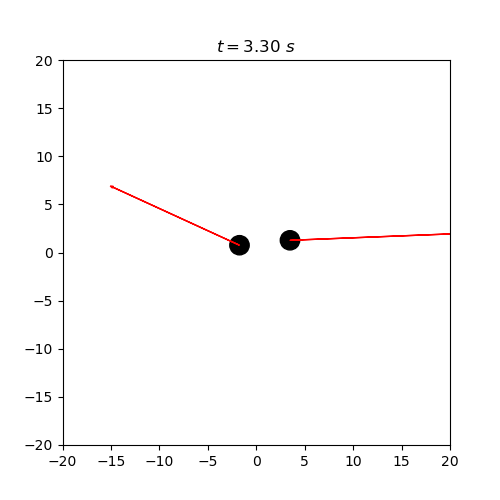

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(t[i]))
    
    for p in Particles:
    
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
    
        circle = plt.Circle((x,y),p.radius, fill=True, color='k')
        ax.add_patch(circle)
    
        ax.arrow(x,y,vx,vy,color='r',head_width=0.2,length_includes_head=True)
    
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)